<a href="https://colab.research.google.com/github/mateusfgomes/calcnumerico/blob/main/interpolacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cálculo Numérico - SME 0104



###**Interpolação Polinomial**

<br>

O principal motivo da existência da interpolação polinomial é o desejo de simplificar a representação de funções muito complexas para um polinômio, discretizando a função complicada dada e encontrando esse polinômio que passa pelos pontos. Com isso, será mais simples realizar operações tais como derivar e integrar.
<br><br>
Dado um conjunto de pontos, queremos definir uma função interpoladora (polinômio de interpolação) que passe por todos os pontos.
<br>
><center>$y_i = P_n(x_i)$
<br>

Teorema da Existência e Unicidade:

"Dados $n+1$ pontos $((x_{0}, y_{0}),...,(x_{n}, y_{n}))$, com $x_0 < ... < x_n$ existe um único polinômio $P_n(x) \in P_n$ que satisfaz as condições acima."+

###**Demonstração**

Para cada ponto que deve estar na interpolação, devemos aplicar $P_n(x)$ sobre $x_i$ para obter $y_i$. Assim, podemos gerar a Matriz de Vandermond

><center>$X=\begin{bmatrix}1 & x_{0} & x^2_{0} & ... & x^n_{0}\\
1 & x_{1} & x^2_{1} & ... & x^n_{1}\\
1 & x_{2} & x^2_{2} & ... & x^n_{2}\\
...    &  ...   &  ...   & ... & ... \\
1 & x_{n} & x^2_{n} & ... & x^n_{n}\\
\end{bmatrix}$

Para demonstrar que o determinante da Matriz de Vandermond é não-nulo, basta lembrar que ele pode ser calculado a partir da coluna 1 (coluna de $x_0, x_1...$) realizando o produtório:

><center>$det(X) = \prod_{i<k} (x_k - x_i) \neq 0$, como $x_k \neq x_i$



###**Forma de Lagrange**

A Forma de Lagrange determina como o polinômio de interpolação $P_n(x)$ será dado, nela. Uma das fraquezas dessa forna é a necessidade de recalular o polinômio inteiro toda vez que um novo ponto é adicionado:

><center> $P_n(x) = y_0l_0(x) + y_1l_1(x) + ... + y_nl_n(x) = \sum^n_{k=0}y_kl_k(x) $

<br>

$l_k(x) \in P_n$, polinômios que dependem somente de $x_0,...,x_n$

O objetivo é apicar o polinômio sobre um $x_i$ e fazer com que ele te "devolva" $yi$. Dessa forma, podemos estabelecer o seguinte:

><center>$P_n(x_i) = y_0l_0(x_i) + ... + y_il_i(x_i) + ... + y_nl_n(x_i) = y_i$

<br> 
Para ter $P_n(x_i) = y_i$ é necessário que os valores os quais acompanham $y_i$ sejam 1 e todos os outros sejam 0. Assim:

><center>$l_k(x_i)=\begin{cases}
1, \ se \ \ i = k \\
0, \ se \ \ i \neq k\\
\end{cases}$


Se pegarmos para $x$ as raízes de $l_k$, isto é, $x_k$ que leva $l_k$ em 0, podemos escrever tais raízes como $\{x_0, ... , x_{x-1}, x_{k-1}, ..., x_n\}$

Daí, fatorando, temos, para x:

><center> $l_k(x) = a \prod^{n}_{{i=0}\\{i \ne k}}(x-x_i)$

Avaliando quando o polinômio é 1, para obter $a$:

><center> $l_k(x_k) = a \prod^{n}_{{i=0}\\{i \ne k}}(x_k-x_i)$

Portando, como, no produtório $i \neq k$, podemos reescrever para $ 0 \le k \le n$. Assim, obtemos o Polinômio de Lagrange:

><center>$l_k(x) = \prod^n_{{i=0}\\{i \ne k}} \frac{x-x_i}{x_k-x_i}$

###**Implementação da Interpolação de Lagrange**


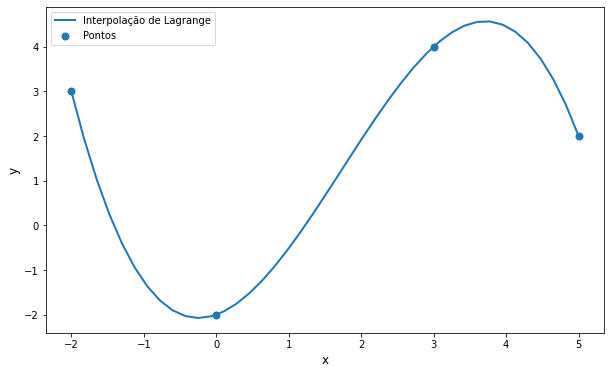

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def LagrangeInterpolation(xi, yi, points):
	m = points.size
	l = np.ones(xi.shape, dtype='double')
	ans = np.zeros(m)
	
	for j in range (0, m):	
		for k in range(0, len(xi)): 
			for i in range(0, len(xi)):
				if i != k:
					l[k] *= (points[j]-xi[i])/(xi[k]-xi[i])	 
		ans[j] = yi.dot(l)
		l = np.ones(xi.shape)
		
	return ans

		
values_x = np.array([-2,0,3,5], dtype='double')
values_y = np.array([3,-2,4,2], dtype='double')
points_x = np.linspace(-2, 5, num=41, endpoint=True)
points_y = LagrangeInterpolation(values_x, values_y, points_x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(points_x,points_y,label = 'Interpolação de Lagrange',linewidth = 2)
plt.scatter(values_x,values_y,label = 'Pontos',linewidth = 2) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('') 
plt.legend() 
plt.show()

###**Forma de Newton**

A Forma de Newton é dada pelo seguinte:

$P_n(x) = \alpha_0 + \alpha_1(x-x_) + \alpha_2(x-x_0)(x-x_1) + ... + \alpha_n(x-x_0)(x-x_1)...(x-x_{n-1})$

Onde cada um dos $\alpha_k \ \ (0 \le k \le n)$ é determinado pela diferença dividida.

<br>

###**Diferença dividida**

A diferença dividida é calculada recursivamente (de forma semelhante ao conceito de DP em computação). A maneira mais fácil de se enxergar como tal cálculo das diferenças é dada pela construção da tabela de diferenças divididas, da seguinte forma:

| $x$ |------&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ordem 0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;------|------&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ordem 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;------|------&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ordem 2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;------|------&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ordem 3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;------| ... |
|-----|---------------------|---------|---------|---------|-----|
|$x_0$|$f[x_0] = \alpha_0$|$f[x_0,x_1] = \alpha_1$|$f[x_0,x_1,x_2] = \alpha_2$|$f[x_0,x_1,x_2,x_3] = \alpha_3$|...|
|$x_1$|$f[x_1]$|$f[x_1,x_2]$|...|...|...|
|$x_2$|$f[x_2]$|$f[x_2,x_3]$|...|...|...|
|$x_3$|$f[x_3]$|...|...|...|...|
|...|...|...|...|...|...|

<br><br>

Onde para $f[x_0, x_1] = \alpha_1 = \frac{f[x_1]-f[x_0]}{x_1-x_0}$.<br><br>
Para $f[x_0, x_1, x_2] = \alpha_2 = \frac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0}$<br><br>
Assim por diante, é importante ressaltar que a divisão é feita por um intervalo que aumenta, isso pode ser esquecido ao aplicar o método. Para o termo geral, temos:<br>

><center>$f[x_{i_{0}},x_{i_{1}},...,x_{i_{k}}] = \frac{f[x_{i_{1}},...,x_{i_{k}}] - f[x_{i_{0}},x_{i_{1}},...,x_{i_{k-1}}]}{x_{i_{k}}-x_{i_{0}}}$

<br>

###**Vantagens da Forma de Newton**
Diferentemente do que ocorre com Lagrange, para a Forma de Newton não é necessário recalcular todos os pontos assim que um novo é adicionado.


###**Erro na Interpolação de Lagrange e Newton**

O erro do polinômio de interpolação da $f(x)$ pode ser dado pelo seguinte teorema, no intervalo $(a,b)$:

><center>$E_n(x) = f(x) - P_n(x) = \frac{f^{(n+1)}(\zeta)}{(n+1)!}$

em que $\zeta \in \ (a,b)$ 

Onde, segue como corolário a aproximação da estimativa do erro:
<br>
><center>$|E_n(x)| \le \frac{1}{(n+1)!} ||f^{(n+1)}||_\infty \prod^n_{i=0}|x-x_i|$
<br>

><center>$|E_n(x)| \le \frac{1}{(n+1)!} ||f^{(n+1)}||_\infty (b-a)^{n-1}$
<br>

Calculando o erro, levanta-se a questão sobre a relação entre o grau do polinômio e a "qualidade" da aproximação realizada, ainda mais, o polinômio da interpolação tende à função conforme aumenta-se o grau?. Tal questão é explicada pelo Fenômeno de Runge.
<br>

###**Fenômeno de Runge**

O Fenômeno de Runge permite concluir que a resposta para a questão levantada acima é "não" e o polinômio não necessariamente tende à função conforme o grau aumenta. Dessa forma, para melhorar a "qualidade" da representação podemos tentar realizar a representação do polinômio por partes, com o uso de splines, por exemplo. O Fenômeno de Runge pode ser representado pelo exemplo abaixo, na qual tenta-se representar a função desenhada pelos polinômios de grau 5, 10 e 15, mostrando que o aumento do grau causou, inclusive, um certo aumento no erro no caso do polinomio de grau 5 para o grau 10, mas, em seguida uma diminuição - de certa forma insignificante, pois continua com um erro maior que o polinômio de grau 5 - nesse erro:





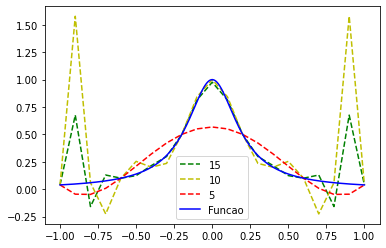

In [ ]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

x_test = np.linspace(-1, 1, num=10000, endpoint=True)
y_test = 1/(1+25*x_test*x_test)

x = np.linspace(-1, 1, num=6, endpoint=True)
y = 1/(1+25*x*x)

# Interpolando para o polinomio de grau 5
grau_5 = interpolate.lagrange(x, y)
grau_5x = np.arange(-1, 1.1, 0.1)
grau_5y = grau_5(grau_5x)

x2 = np.linspace(-1, 1, num=11, endpoint=True)
y2 = 1/(1+25*x2*x2)

#Interpolando para o polinomio de grau 10
grau_10 = interpolate.lagrange(x2, y2)
grau_10x = np.arange(-1, 1.1, 0.1)
grau_10y = grau_10(grau_10x)


x3 = np.linspace(-1, 1, num=16, endpoint=True)
y3 = 1/(1+25*x3*x3)     

#Interpolando para o polinomio de grau 15
grau_15 = interpolate.lagrange(x3, y3)
grau_15x = np.arange(-1, 1.1, 0.1)
grau_15y = grau_15(grau_15x)


#Plotando o Fenômeno de Runge
plt.plot(grau_15x, grau_15y, 'g--', grau_10x, grau_10y, 'y--', grau_5x, grau_5y, 'r--', x_test, y_test, 'b-')
plt.legend(['15', '10', '5', 'Funcao'], loc='best')
plt.show()

###**Splines**

Splines são aplicações das interpolações que dividem por partes a função a ser representada com mais de um polinômio, sendo cada um deles de grau $k$. Nesse trabalho, serão apresentadas Splines Cúbicas e Splines Lineares com suas aplicações tanto implementadas por código, quanto presentes no mundo real.<br> Formalizando esse conceito, temos, para $(n+1)$ pontos no intervalo $[a,b]$, sendo cada um deles: $(x_0,y_0),...,(x_n,y_n)$ com $ a = x_0 < ... < x_n = b$, temos três condições que precisam ser satisfeitas:<br>
* $S_{k,i} = S_k|_{x_i,x_{i+1}}$, com $0 \le i \le n-1$;
* $S_{k} \in C^{k-1}([a,b])$;
* $S_k(x_i) = y_i$, com $0 \le i \le n$

####**Spline Linear**

Considerando o conceito já abordado sobre Splines, a spline linear tem a função de passar pelos pontos desejados com um polinômio de grau 1 ($k = 1$). Tal spline tem sua aplicação como é dado abaixo. Nesse caso, aplicou-se uma Spline Linear utilizando a biblioteca já implementada na SciPy sobre 6 pontos igualmente espaçados sobre a função $cos(x^2)$



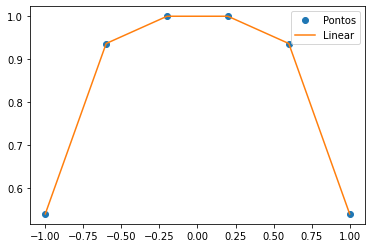

In [ ]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-1, 1, num=6, endpoint=True)
y = np.cos(x*x)

f = interpolate.interp1d(x, y)

fxnew = np.arange(-1, 1.1, 0.1) #1.1 so para fins de ilustrar melhor as curvas passando pelo ponto
fynew = f(fxnew)   
plt.plot(x, y, 'o', fxnew, fynew, '-')
plt.legend(['Pontos', 'Linear'])
plt.show()

###**Spline Cúbica**

A Spline cúbica interpola usando polinomios de grau 3 para passar entre os pontos, diferente do que ocorre com a spline linear mostrada acima, ao aplicarmos a spline cúbica ao intervalo da mesma função usada na spline linear. Nesse caso, é possível ver que a Spline Cúbica obteve um resultado bem próximo a função dada ($cos(x^2)$), pois a função quase sobrepõe o pontilhado totalmente


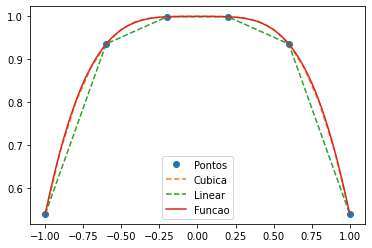

In [ ]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

x_test = np.linspace(-1, 1, num=10000, endpoint=True)
y_test = np.cos(x_test*x_test)
x = np.linspace(-1, 1, num=6, endpoint=True)
y = np.cos(x*x)

g = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y)

fxnew = np.arange(-1, 1.1, 0.1) 
fynew = f(fxnew)   

gxnew = np.arange(-1, 1.1, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
gynew = g(gxnew)

plt.plot(x, y, 'o', gxnew, gynew, '--', fxnew, fynew, '--', x_test, y_test, '-')
plt.legend(['Pontos', 'Cubica', 'Linear','Funcao'])
plt.show()

###**CAD em Engenharia**

Nesse caso abaixo, retoma-se um exemplo do uso de spline cúbicas para desenhar o teto de um carro. Tal exemplo tinha sido aplicado em uma das aulas em vídeo displonibilizadas no site da disciplina

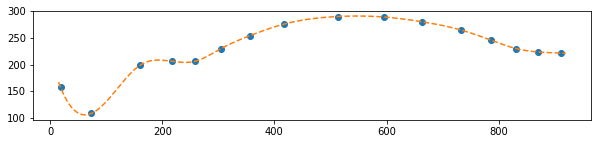

In [ ]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

x = np.array([18.5, 73.5, 160, 218, 258, 305, 356, 418, 513, 596, 664, 732, 787, 831, 871, 912])
y = np.array([157.5, 108.5, 198.5, 206, 206, 230, 254, 276, 290, 289, 280, 265, 245.5, 230, 223.5, 221.5])

g = interpolate.CubicSpline(x,y)

gxnew = np.arange(15, 920, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
gynew = g(gxnew)

plt.figure(figsize=(10,2))
plt.plot(x, y, 'o', gxnew, gynew, '--')
plt.show()


###**Uso de Splines Cúbicas e Lineares para criação de Perfis Topográficos**

O processo de construção de um perfil topográfico consiste de várias etapas. Primeiramente, é necessário um mapa do relevo (carta topográfica) da região sobre a qual o desenho do perfil topográfico será aplicado, para as aplicações dadas abaixo, foram utilizadas cartas topográficas de duas cidades brasileiras: Rio de Janeiro (com uma carta de escala 1:250.000) e Uberlândia (com uma carta de escala 1:100.000), disponíveis no site do IBGE, assim como ocorre em todas as cidades brasileiras. Tais cidades foram escolhidas para exemplificar uma situação na qual é possível notar a presença de um rio por meio do perfil topográfico e outra com um alto relevo formando o Morro da Tijuca, próximo ao Cristo Redentor.<br><br>
**Região escolhida do Rio de Janeiro:**<br>
![Imagem Rio de Janeiro](https://i.ibb.co/tL4pfbh/areauberlandia.png)<br><br>
**Região escolhida de Uberlândia:**<br>
![Imagem Uberlandia](https://i.ibb.co/K07j6TJ/arearj.png)<br><br>

Foram apresentadas somente as regiões escolhidas para traçar o Perfil Topográfico pois as imagens das cartas completas demoram um certo tempo para serem carregadas na plataforma, mas podem ser visualizadas no site do IBGE e nos seguintes links:<br> 
**Carta Topográfica do Rio de Janeiro:**<br>
https://i.ibb.co/XCg5FJf/ta491-502sp.png<br>
**Carta Topográfica de Uberlândia:**<br>
https://i.ibb.co/SrwdjDY/ta2451sp.png

Em segundo lugar, após escolher o mapa da região, é necessário traçar uma reta sobre as curvas de nível delimitando qual será a área representada no perfil. Nesse ponto, é importante imaginar a área desejada se colocando como um observador no chão, perpendicularmente ao plano que será representado (a linha desenhada). Essas linhas abaixo mostradas foram traçadas com a finalidade de ilustrar e causar um melhor entendimento, quanto mais fino o traço for realizado, melhor será o resultado. Traçar tal linha, na prática, para realização desse trabalho, foi feito recortando uma linha extremamente fina da folha topográfica no Adobe Photoshop CC. Abaixo, encontram-se as imagens com suas respectivas linhas traçadas:<br><br>
**Linha sobre o Rio de Janeiro:**<br>
![Imagem Rio de Janeiro](https://i.ibb.co/6s84Dp8/tracorj.png)<br><br>
**Linha sobre Uberlândia:**<br>
![Imagem Uberlandia](https://i.ibb.co/0n0NRGR/tracouberlandia.png)<br><br>


Após realização do traço, observa-se onde tal linha intersecta as curvas de nível. Como nos exemplos - novamente, apenas ilustrativos, quanto menores forem marcadas as intersecções, mais precisão se obtém - foram colocados pontos azuis nas intersecções: <br><br>

**Intersecções (Rio de Janeiro):**<br>
![Imagem Intersecções](https://i.ibb.co/VmzxDP8/interrj.png)<br><br>

**Intersecções (Uberlândia):**<br>
![Imagem Intersecções](https://i.ibb.co/LdynTYk/interuberlandia.png)<br><br>

Após realizar tais operações, podemos dizer que temos nosso "Eixo X" pronto. A linha vermelha com os pontos correspondem as coordenadas do eixo das abscissas de cada um dos pontos. Até esse momento, todas as tarefas realizadas acima foram feitas manualmente, a seguir, é preciso fazer com que um programa identifique esse "Eixo X" criado para poder ser plotado com a biblioteca PyPlot. Para isso, utilizou-se da biblioteca OpenCV sobre o recorte realizado no Photoshop anteriormente, as imagens das intersecções estão mostradas abaixo:

**Intersecções (Rio de Janeiro):**<br>
![Imagem Intersecções](https://i.ibb.co/8XQXLhh/rj.png)<br><br>
**Intersecções (Uberlândia):**<br>
![Imagem Intersecções](https://i.ibb.co/84c2S2x/uberlandia.png)<br><br>

Utilizando a biblioteca OpenCv, desejamos encontrar as coordenadas x dos pontos pretos sobre essa linha branca. Ao obter tais coordenadas, temos o Eixo X montado numa variável. Precisamos agora usar das curvas de nível para obter as alturas de cada ponto. Mas antes é importante falar sobre essas curvas.

###**Determinando Altura das Curvas de Nível**
<br>

Ao utilizar as curvas de nível para determinar, precisamos saber: qual altura tal curva de nível representa? Para responder essa pergunta, é importante observar os picos - marcados com 'x' nas imagens mostradas anteriormente -. Cada um deles contém a altura maior que a curva de nível na qual estão no interior. A partir de um pico, podemos determinar a altura da curva de nível cruzada pela nossa reta. Para avaliar tal altura, observa-se a escala do gráfico conforme a tabela mostrada, onde equidistância mostra a distância entre as linhas de nível e as curvas mestras são as linhas mais escuras da imagem, colocadas a cada $x$ metros dependendo da escala:

![Tabela](https://i.ibb.co/zGYrBds/tabela.png)


###**Construção das Alturas**
<br>

Para os mapas do Rio e de Uberlândia teremos uma equidistância de 50m e 100m e curvas mestras de 250m e 500m, respectivamente. Assim, montamos o vetor de alturas de cada um dos pontos da seguinte forma:

* Para o RJ: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 200, 200, 100, 100, 100, 100]
* Para Uberlândia: [930, 900, 850, 800, 750, 700, 650, 650, 650, 600, 600, 650, 700, 750]

Após isso, temos as coordenadas $(x,y)$ de todos os pontos, tanto para Uberlândia, quanto para o Rio de Janeiro


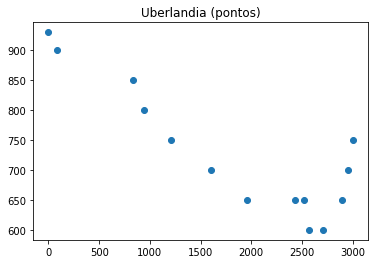

In [ ]:
import cv2
import scipy
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


path = 'uberlandia.png'

uberlandia_curvas = cv2.imread(path,0)

th, threshed = cv2.threshold(uberlandia_curvas, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 


cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 



s1 = 0
s2 = 80
curvas = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        curvas.append(cnt)

x = []
for i in range(len(curvas)):
    x.append(curvas[i][0][0][0])

x.append(0) ## adicionando o pico
x = x[::-1]
y = [930, 900, 850, 800, 750, 700, 650, 650, 650, 600, 600, 650, 700, 750]

interpoladora = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y, fill_value='extrapolate')


interpoladoraxnew = np.arange(0, 3000, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
interpoladoraynew = interpoladora(interpoladoraxnew)
fxnew = np.arange(0, 3000, 0.1)
fynew = f(fxnew)


plt.plot(x, y, 'o')
plt.title('Uberlandia (pontos)')

plt.show()


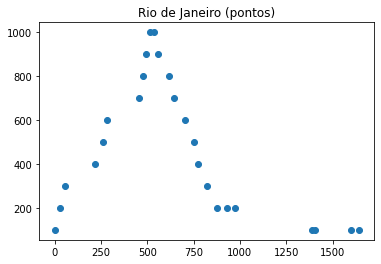

In [ ]:
import cv2
import scipy
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


path = 'rj.png'

rj_curvas = cv2.imread(path,0)

th, threshed = cv2.threshold(rj_curvas, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 


cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 

#print(cnts)

s1 = 0
s2 = 80
curvas = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        curvas.append(cnt)

x = []
for i in range(len(curvas)):
    x.append(curvas[i][0][0][0])


x = x[::-1]

x.pop()

y = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 200, 200, 100, 100, 100, 100]

g = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y, fill_value='extrapolate')

gxnew = np.arange(0, 1700, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
gynew = g(gxnew)
fxnew = np.arange(0, 1700, 0.1)
fynew = f(fxnew)


plt.plot(x, y, 'o')
plt.title('Rio de Janeiro (pontos)')
plt.show()


Usando uma Spline Cúbica e outra Linear (para observar qual realizar uma melhor interpolação), conectando os pontos, temos:

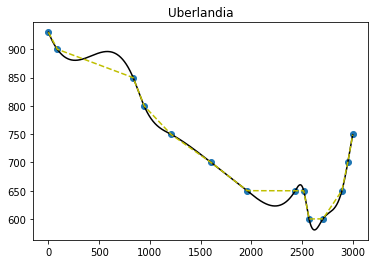

In [ ]:
import cv2
import scipy
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


path = 'uberlandia.png'

uberlandia_curvas = cv2.imread(path,0)

th, threshed = cv2.threshold(uberlandia_curvas, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 


cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 



s1 = 0
s2 = 80
curvas = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        curvas.append(cnt)

x = []
for i in range(len(curvas)):
    x.append(curvas[i][0][0][0])

x.append(0) ## adicionando o pico
x = x[::-1]
y = [930, 900, 850, 800, 750, 700, 650, 650, 650, 600, 600, 650, 700, 750]

interpoladora = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y, fill_value='extrapolate')


interpoladoraxnew = np.arange(0, 3000, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
interpoladoraynew = interpoladora(interpoladoraxnew)
fxnew = np.arange(0, 3000, 0.1)
fynew = f(fxnew)

plt.plot(x, y, 'o', interpoladoraxnew, interpoladoraynew, 'k-', fxnew, fynew, 'y--')
plt.title('Uberlandia')
plt.show()


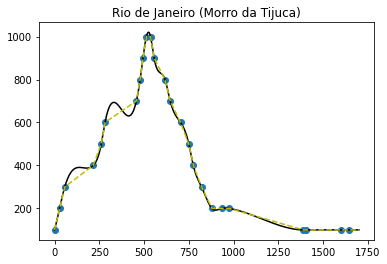

In [ ]:
import cv2
import scipy
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


path = 'rj.png'

rj_curvas = cv2.imread(path,0)

th, threshed = cv2.threshold(rj_curvas, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 


cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 

#print(cnts)

s1 = 0
s2 = 80
curvas = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        curvas.append(cnt)

x = []
for i in range(len(curvas)):
    x.append(curvas[i][0][0][0])


x = x[::-1]

x.pop()

y = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 200, 200, 100, 100, 100, 100]

g = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y, fill_value='extrapolate')

gxnew = np.arange(0, 1700, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
gynew = g(gxnew)
fxnew = np.arange(0, 1700, 0.1)
fynew = f(fxnew)


plt.plot(x, y, 'o', gxnew, gynew, 'k-', fxnew, fynew, 'y--')
plt.title('Rio de Janeiro (Morro da Tijuca)')
plt.show()


###**Considerações Finais**

É extremamente interessante observar o comportamento das splines para plotar tais Perfis Topográficos, princiramente, pois o trabalho da Spline é realizado de uma forma mais suave e automática. Outra questão importante de ser abordada é o fato de em alguns pontos, como, por exemplo, entre 260 e 450 no Eixo X traçado do Morro da Tijuca, na figura acima. Nessa situação, a Spline Linear apresentou um comportamento mais fiel a realidade, provavelmente, mas que não anula o que foi traçado pela mesma Cúbica, algo que não ocorre muito usuamente para essas situações.